## Decision Tree

## Tiatnic Survival Dataset

## 1. Import the Necessary Libraries.

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## 2. Load the data sets - train and test. 

In [2]:
df=pd.read_csv("train_titanic.csv")

## 3. Look at top values of train data. 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4. Print the column names of train data.

In [4]:
print("\n        COLUMN NAMES OF DATASET          \n")
df.columns


        COLUMN NAMES OF DATASET          



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 5. Print the dimension of train and test data.

In [5]:
print("NUMBER OF ROWS AND COLUMNS",df.shape)

NUMBER OF ROWS AND COLUMNS (891, 12)


## 6. Print the number of missing values in each column of train and test data.

In [6]:
print("\nMISSING VALUES IN THE DATASET\n")
df.isnull().sum()


MISSING VALUES IN THE DATASET



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

## 1. Barchart of Survived, Pclass, Sex, Embarked.

/tmp/ipykernel_7514/3404665237.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


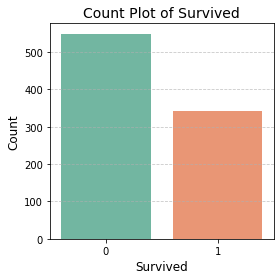

/tmp/ipykernel_7514/3404665237.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


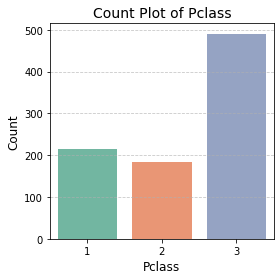

/tmp/ipykernel_7514/3404665237.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


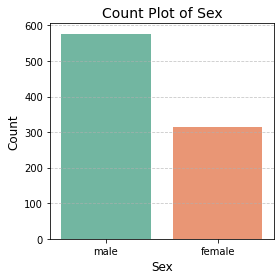

/tmp/ipykernel_7514/3404665237.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


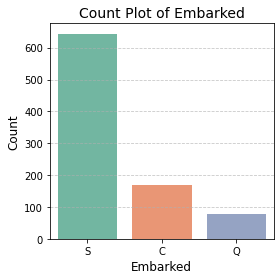

In [7]:
cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

for col in cols:
    plt.figure(figsize=(4, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Count Plot of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## 2. Histogram of Age, Parch, Fare.

In [8]:
np.isinf(df.select_dtypes(include=[np.number])).sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

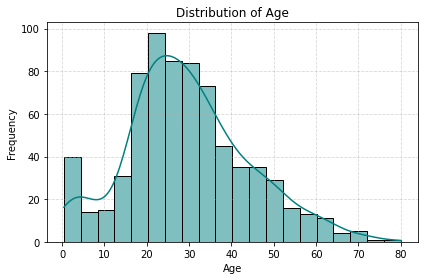

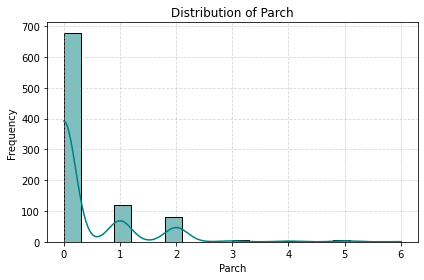

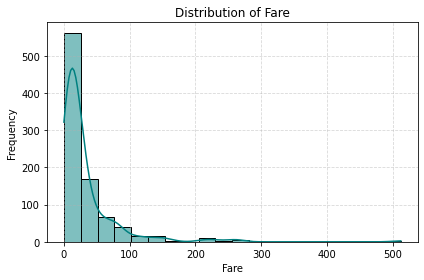

In [9]:
warnings.filterwarnings("ignore", category=FutureWarning)
for col in ['Age', 'Parch', 'Fare']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=True, color='teal', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

## 3. Plot histogram of age for survived and did not survived class.

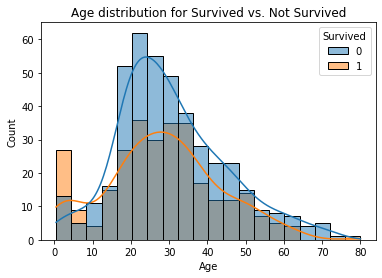

In [10]:
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True)
plt.title("Age distribution for Survived vs. Not Survived")
plt.show()

## 4. Count class and geder wise survival rate - plot with appropriate chart.

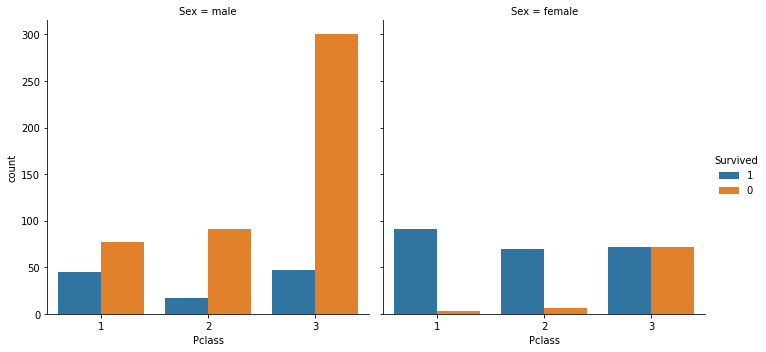

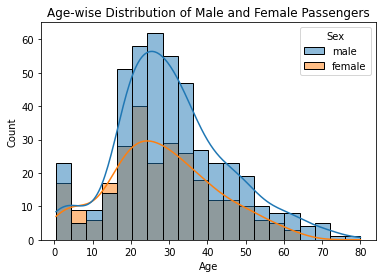

In [11]:
df['Survived'] = df['Survived'].astype('str')
sns.catplot(data=df, x='Pclass', hue='Survived', col='Sex', kind='count')
plt.show()

sns.histplot(data=df, x='Age', hue='Sex', bins=20, kde=True )
plt.title("Age-wise Distribution of Male and Female Passengers")
plt.show()

## 5. Histogram of Age of the given data set(sample).

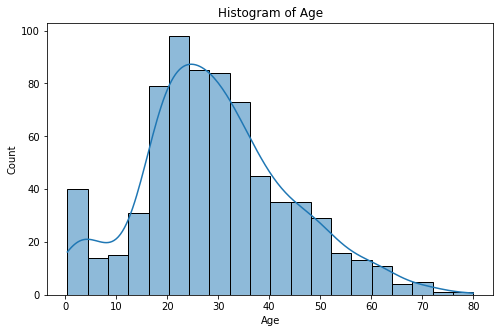

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Age")
plt.show()

## Handling Missing Values

## 1. Replace the missing values in Embarked column by 'S'.

In [13]:
df['Embarked'].fillna('S',inplace=True)

## 2. Impute the missing values in Fare column with median value.

In [14]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)

## 3. Impute the Age column. It has too many missing values but it may be important. 
## We fill the missing values with numbers randomly drawn from distribution.
## that has same mean and standard deviation as non missing Age data.


In [15]:
mean_age = df['Age'].mean()
std_age = df['Age'].std()
num_missing = df['Age'].isnull().sum()

random_ages = np.random.normal(mean_age, std_age, num_missing)
df.loc[df['Age'].isnull(), 'Age'] = random_ages

## Feature Engineering - Creating new features

## 1. Create and add a new feature FamilySize as a combination of SibSp and Parch.
FamilySize = Parch + SibSp + 1.

In [16]:
df['FamilySize']=df['SibSp']+df['Parch']+1

## 2. Create new feature IsAlone from FamilySize.
 If FamilySize == 1 then IsAlone = True else IsAlone = False.

In [17]:
df['IsAlone']=(df['FamilySize']==1).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


## Create a new attribute Has_cabin using the attribue Cabin. 
if Cabin == NaN the Has_cabin = False else Has_cabin = True


Drop the columns which may not be useful in prediction of survival.
## 1. Drop PassengerId, Name, Ticket, and Cabin.


In [18]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [19]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.000000,1,0,7.2500,S,2,0
1,1,1,female,38.000000,1,0,71.2833,C,2,0
2,1,3,female,26.000000,0,0,7.9250,S,1,1
3,1,1,female,35.000000,1,0,53.1000,S,2,0
4,0,3,male,35.000000,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,1
887,1,1,female,19.000000,0,0,30.0000,S,1,1
888,0,3,female,18.869896,1,2,23.4500,S,4,0
889,1,1,male,26.000000,0,0,30.0000,C,1,1


## Model Building

## 1. Prepare X and y.
## Define target variable (y) and features (X).

In [20]:
X=df.drop(columns='Survived')
y = df['Survived']

## Check existing column names

In [21]:
print("\nX COLUMN NAMES\n",X.columns)
print("y column name: ",y.name)


X COLUMN NAMES
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'FamilySize', 'IsAlone'],
      dtype='object')
y column name:  Survived


## 2. Label encoding of categorical features.

In [22]:
print(df.dtypes)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  
df['Embarked'] = le.fit_transform(df['Embarked'])  
print(df[['Sex', 'Embarked']].head())
df.dtypes

Survived       object
Pclass          int64
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
FamilySize      int64
IsAlone         int64
dtype: object
   Sex  Embarked
0    1         2
1    0         0
2    0         2
3    0         2
4    1         2


Survived       object
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked        int64
FamilySize      int64
IsAlone         int64
dtype: object

## 3.concat df_categorical with original df.

In [23]:
df_categorical = df.select_dtypes(include=['object'])

In [24]:
df_categorical

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [25]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,1,22.000000,1,0,7.2500,2,2,0
1,1,1,0,38.000000,1,0,71.2833,0,2,0
2,1,3,0,26.000000,0,0,7.9250,2,1,1
3,1,1,0,35.000000,1,0,53.1000,2,2,0
4,0,3,1,35.000000,0,0,8.0500,2,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1
887,1,1,0,19.000000,0,0,30.0000,2,1,1
888,0,3,0,18.869896,1,2,23.4500,2,4,0
889,1,1,1,26.000000,0,0,30.0000,0,1,1


## 4.Do a pairplot of all features.

In [26]:
df.dtypes

Survived       object
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked        int64
FamilySize      int64
IsAlone         int64
dtype: object

KeyError: 'Survived'

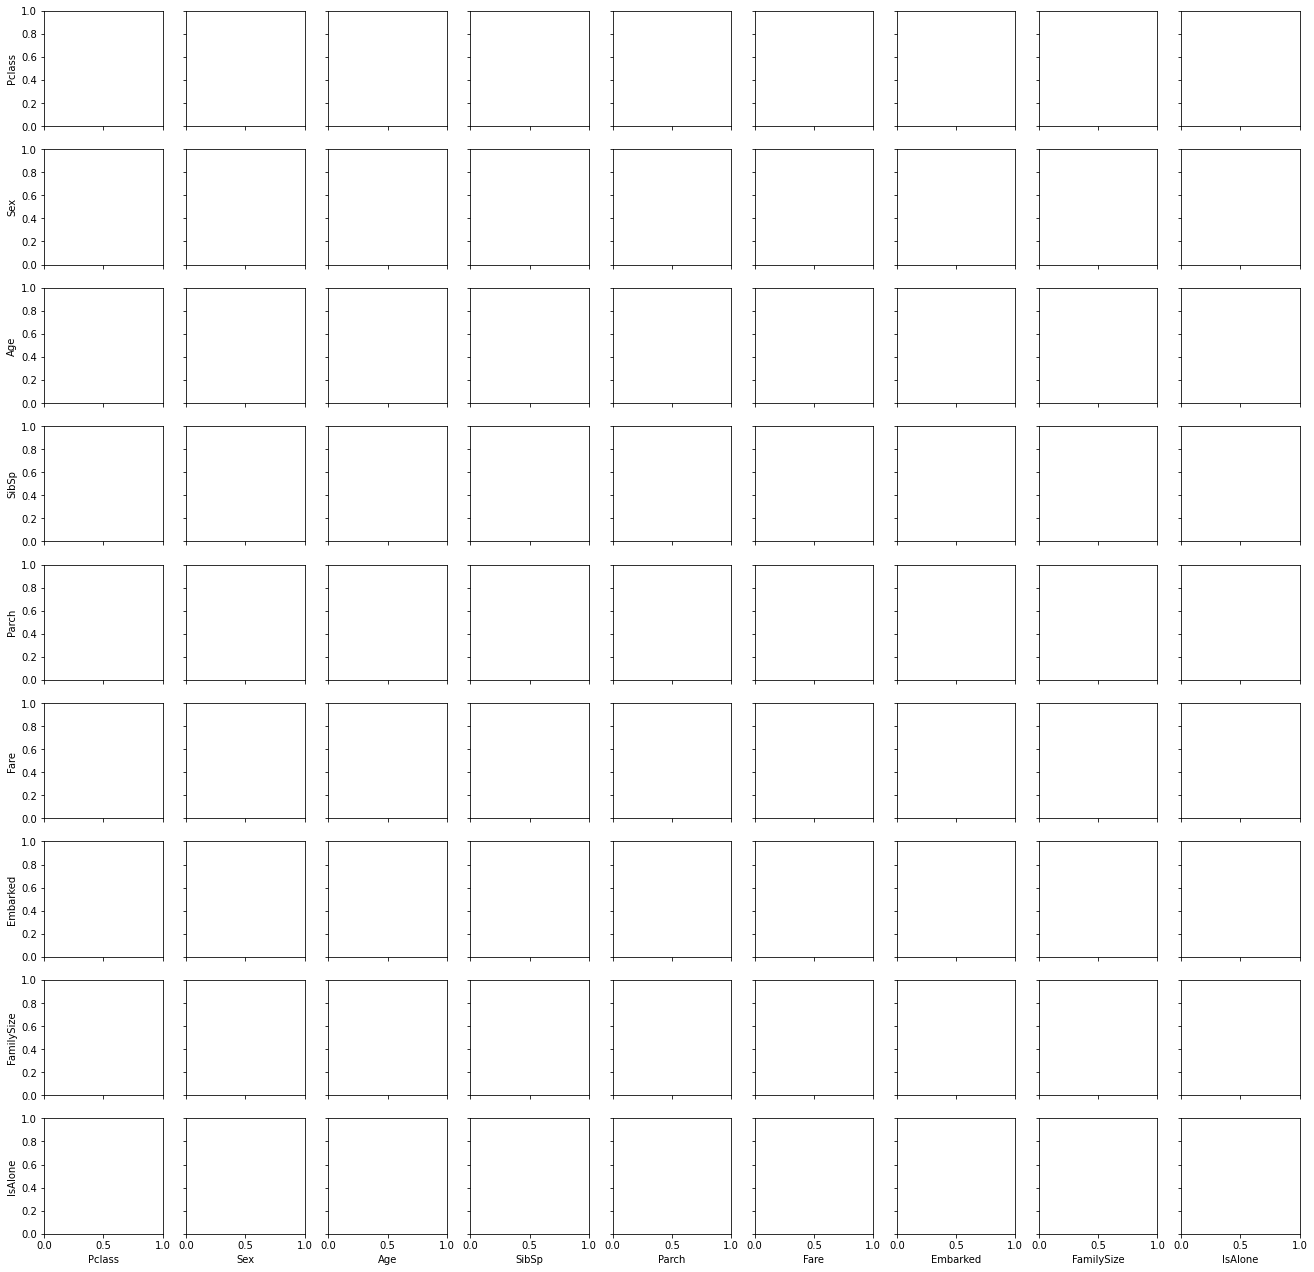

In [27]:
#plt.figure(figsize=(12, 10))
df_numeric = df.select_dtypes(include='number')  
sns.pairplot(df_numeric, hue='Survived', diag_kind='kde')
plt.show()

## 5. Splitting the data into train and validation set - 90% train 10% validation.
## X_train, X_test, y_train, y_validation.


In [35]:
X = df.drop(columns=['Survived'])  
y = df['Survived'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_test.shape[0]} samples")

Training set size: 801 samples
Validation set size: 90 samples


## 6. Create the model.
##    Fitting the decision tree with default hyperparameters.
##    Importing decision tree classifier from sklearn library.

In [36]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 7. Print the tree.
##    Importing required packages for visualization.

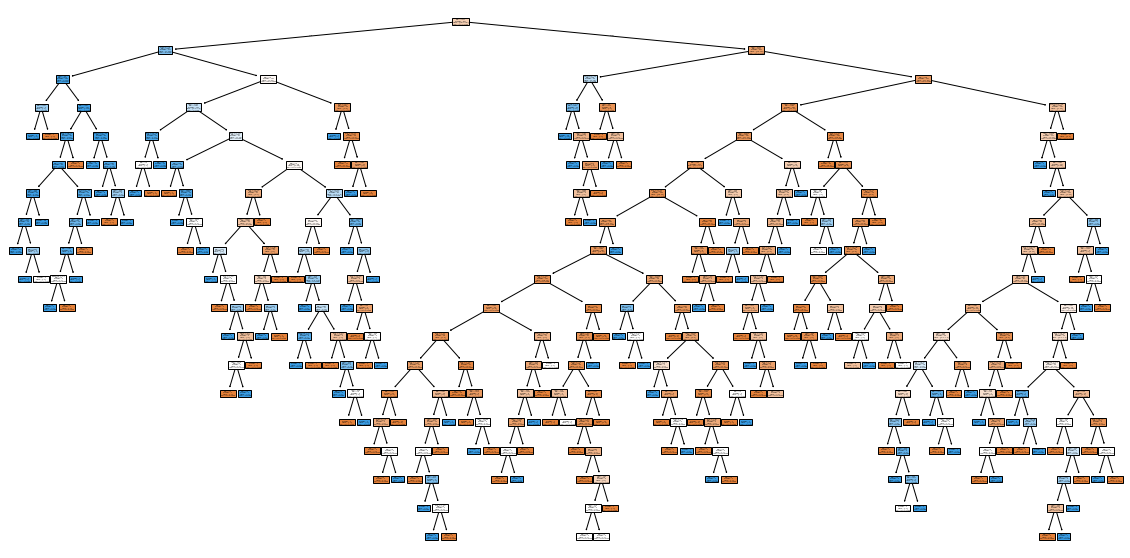

In [37]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [38]:
tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- Fare <= 116.86
|   |   |   |   |--- class: 1
|   |   |   |--- Fare >  116.86
|   |   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- Fare <= 28.86
|   |   |   |   |--- Fare <= 28.23
|   |   |   |   |   |--- SibSp <= 0.50
|   |   |   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |   |   |--- Age <= 23.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Age >  23.50
|   |   |   |   |   |   |   |   |--- IsAlone <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- IsAlone >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Age >  24.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- SibSp >  0.50
|   |   |   |   |   |   |--- FamilySize <= 2.50
|   |   |   |   |   |   |   |--- Age <= 43.00
|   |   |   |   |   |   |   |   |--- Fare <= 22.50
|   |   |   |   |   |   | 

## 8. plotting tree with max_depth=3.

In [39]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

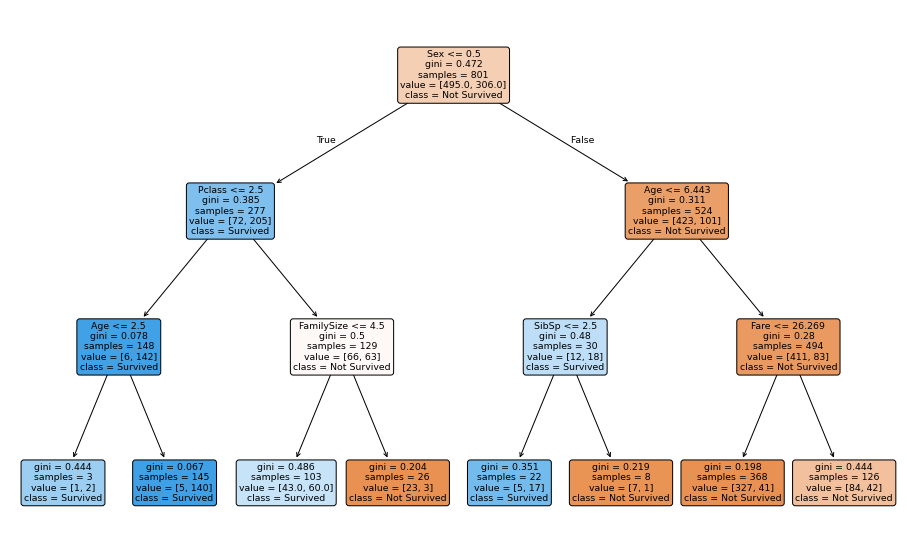

In [40]:
plt.figure(figsize=(16, 10))
plot_tree(model,feature_names=X.columns,class_names=['Not Survived', 'Survived'],filled=True,rounded=True)
plt.show()

<img src="tree2.png">

## Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

In [43]:
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")

y_test shape: (90,)
y_pred shape: ()


## Making predictions.

In [45]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: ['0' '0' '0' '1' '1' '1' '1' '0' '1' '1' '0' '0' '0' '0' '0' '1' '0' '1'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0'
 '0' '1' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '1' '0' '0'
 '0' '1' '0' '1' '1' '1' '0' '1' '1' '0' '0' '1' '0' '0' '0' '1' '1' '1'
 '0' '1' '0' '0' '1' '1' '1' '1' '0' '1' '1' '0' '0' '0' '1' '1' '0' '0']


## Printing confusion matrix and accuracy.

In [47]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
 [[46  8]
 [ 8 28]]
Accuracy: 0.82
